In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
#generating some data
X,y = make_blobs(n_samples=100,centers=3)

In [7]:
  type(X)

numpy.ndarray

In [9]:
X[0:9,:]

array([[ -8.54169619,   6.16375407],
       [-10.94526995,   4.77825161],
       [ -4.4321382 ,  -2.63825466],
       [ -6.7002271 ,  -3.37384344],
       [ -5.0874745 ,  -4.3410597 ],
       [-10.87568196,   6.1901921 ],
       [ -6.5427366 ,  -1.22255613],
       [  9.6423677 ,  -9.04518977],
       [ -3.98529462,  -1.81636491]])

In [10]:
y

array([0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1])

In [11]:
A = sns.load_dataset('iris')
A.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#150 samples in data for four features
A.shape

(150, 5)

In [13]:
A.iloc[60:65]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor
62,6.0,2.2,4.0,1.0,versicolor
63,6.1,2.9,4.7,1.4,versicolor
64,5.6,2.9,3.6,1.3,versicolor


In [14]:
 C = pd.read_csv(r"/home/mitraa/Jupyter Notebook/Datascience practices/CSV files/Bias_correction_ucl.csv")

In [15]:
C.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [16]:
C.shape

(7752, 25)

# Regression

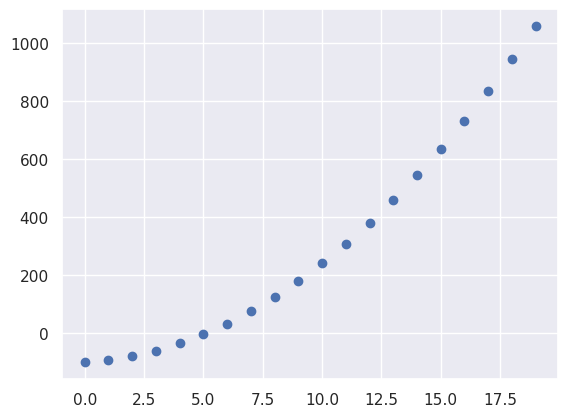

In [17]:
n = 20
X = np.arange(n) # X is the feature
y = 4*X + 3*(X**2)-100 # y is the target and that's a mapping between X and y
plt.scatter(X,y)

In [18]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [19]:
y

array([-100,  -93,  -80,  -61,  -36,   -5,   32,   75,  124,  179,  240,
        307,  380,  459,  544,  635,  732,  835,  944, 1059])

In [20]:
from sklearn.linear_model import LinearRegression

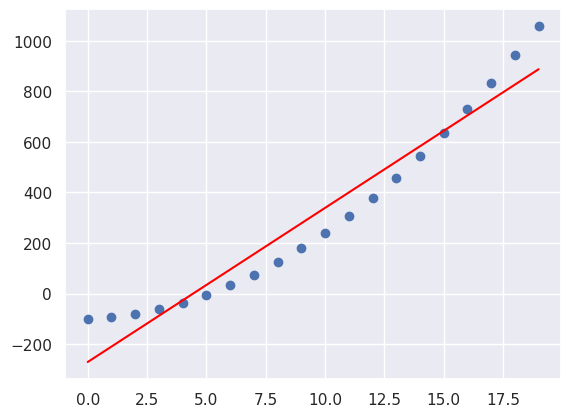

In [23]:
#buildinng a model 
m = LinearRegression()#the model
m.fit(X[:,np.newaxis],y)
y_pred = m.predict(X[:,np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

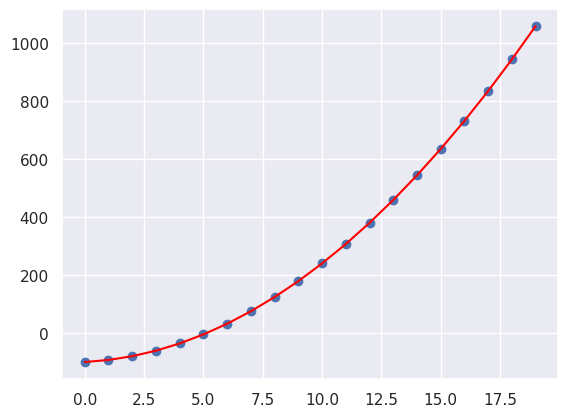

In [27]:
# to make model more flexible
from sklearn.preprocessing import PolynomialFeatures

#transforing to the neaw features
polyModel = PolynomialFeatures(degree=2, include_bias=True)
X_poly = polyModel.fit_transform(X[:,np.newaxis])

m = LinearRegression()#the model
m.fit(X_poly,y)
y_pred = m.predict(X_poly)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [28]:
# the 4 is for X and 3 is for X and 100 shown as 0
m.coef_

array([0., 4., 3.])

# Classification

In [30]:
X = sns.load_dataset('iris')
y = X.species

In [31]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [32]:
x = X.drop(columns={'species'})
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
x.shape

(150, 4)

In [34]:
y.shape

(150,)

In [35]:
#trainig data
from sklearn.svm import SVC

In [38]:
m = SVC(gamma='auto')
m.fit(x,y)

SVC(gamma='auto')

In [39]:
y_pred = m.predict(x)

In [40]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

In [42]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object